#KNN 
####K Nearest Neighbors

 - Input: Nominal or Continuous
 - Output: Nominal or Continous

Using a distance metric, you determine which k data points are closest to the one you put in and give each of them a vote on the prediction

```
For datapoint in training set:
    calculate distance from datapoint to new_value
Order distances in increasing order and take the first k
Take the label with the most votes
```

PROS: 
 - Easy to train (save all the data)
 - Easy with lots of classes
 - Easy to add new training datapoints

CONS:
 - really slow to predict - especially if lots of neighbors
 
####Distance Metrics:
 - Euclidian Distance
 - Cosine Similarity

In [2]:
def euclidean_distance(a, b):
    return np.sqrt(np.dot(a - b, a - b))

def cosine_distance(a, b):
    return 1 - np.dot(a, b) / np.sqrt(np.dot(a, a) * np.dot(b, b))

####Basic Method to Run KNN:

In [14]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier 

#if I wanted to test accuracy, ect, could use this metric:
from sklearn.metrics import accuracy_score, precision_score, recall_score

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


#some random data just to the sake of having a classifer
X, y = make_classification(n_features=4, n_redundant=0, n_informative=1,
                               n_clusters_per_class=1, class_sep=5,
                               random_state=5)

In [16]:

KNNmodel = KNeighborsClassifier(n_neighbors=4)
KNNmodel.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           n_neighbors=4, p=2, weights='uniform')

####Plot the Decision Boundary!

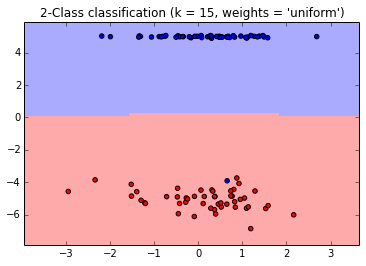

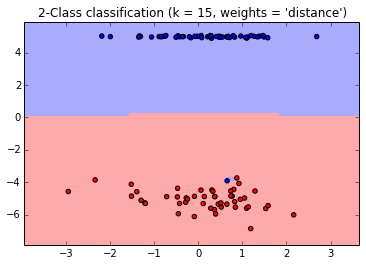

In [23]:
def plot_decision_boundary(X, y, n_neighbors, h=0.2):

    #h= .02 ,  step size in the mesh
    #choose a subset of X to draw. It has four features, we can only plot 2. 
    X = X[:,:2]

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                             np.arange(y_min, y_max,h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("2-Class classification (k = %i, weights = '%s')"
                  % (n_neighbors, weights))

    plt.show()
    
plot_decision_boundary(X,y, 15)

###Awesome Code I stole that is a Homemade KNN:

In [24]:
import numpy as np
import pandas as pd
from collections import Counter
from itertools import izip
from sklearn.datasets import make_classification

def euclidean_distance(a, b):
    return np.sqrt(np.dot(a - b, a - b))

def cosine_distance(a, b):
    return 1 - np.dot(a, b) / np.sqrt(np.dot(a, a) * np.dot(b, b))

class KNearestNeighbors(object):
    def __init__(self, k=5, distance=euclidean_distance):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = np.zeros((self.X_train.shape[0], X.shape[0]))
        for i, x in enumerate(X):
            for j, x_train in enumerate(self.X_train):
                distances[i, j] = self.distance(x_train, x)
        top_k = y[distances.argsort()[:,:self.k]]  #sort and take top k
        result = np.zeros(X.shape[0])
        for i, values in enumerate(top_k):
            result[i] = Counter(values).most_common(1)[0][0]
        return result

    def classify(self, x):
        distances = []
        for row in self.X:
            distances.append(self.distance(row, x))
        sorted_distances = sorted(izip(distances, self.y), key=lambda a: a[0])
        return Counter(a[1] for a in sorted_distances[:self.k]).most_common(1)[0][0]


if __name__ == '__main__':
    X, y = make_classification(n_features=4, n_redundant=0, n_informative=1,
                               n_clusters_per_class=1, class_sep=5,
                               random_state=5)
    knn = KNearestNeighbors(3, cosine_distance)
    knn.fit(X, y)
    print "\tactual\tpredict\tcorrect?"
    for i, (actual, predicted) in enumerate(izip(y, knn.predict(X))):
        print "%d\t%d\t%d\t%d" % (i, actual, predicted, int(actual == predicted))

	actual	predict	correct?
0	0	0	1
1	1	1	1
2	1	1	1
3	1	1	1
4	1	1	1
5	0	0	1
6	0	0	1
7	1	1	1
8	0	0	1
9	0	0	1
10	0	0	1
11	0	0	1
12	1	1	1
13	1	1	1
14	1	1	1
15	1	1	1
16	1	1	1
17	1	1	1
18	1	1	1
19	1	1	1
20	1	1	1
21	0	0	1
22	1	1	1
23	0	0	1
24	0	0	1
25	1	1	1
26	0	0	1
27	0	0	1
28	1	1	1
29	0	0	1
30	0	0	1
31	1	1	1
32	0	0	1
33	1	1	1
34	0	0	1
35	0	0	1
36	0	0	1
37	1	0	0
38	1	1	1
39	1	1	1
40	1	1	1
41	0	0	1
42	0	0	1
43	1	1	1
44	0	0	1
45	1	1	1
46	0	0	1
47	1	1	1
48	0	0	1
49	0	0	1
50	0	0	1
51	0	0	1
52	0	0	1
53	0	0	1
54	0	0	1
55	1	1	1
56	0	0	1
57	0	0	1
58	1	1	1
59	1	1	1
60	0	0	1
61	1	1	1
62	1	1	1
63	0	0	1
64	1	1	1
65	1	1	1
66	1	1	1
67	0	0	1
68	1	1	1
69	0	0	1
70	0	0	1
71	1	1	1
72	0	0	1
73	1	1	1
74	0	0	1
75	1	1	1
76	1	1	1
77	0	0	1
78	0	0	1
79	1	1	1
80	0	0	1
81	0	0	1
82	1	1	1
83	1	1	1
84	1	1	1
85	0	0	1
86	0	0	1
87	1	1	1
88	0	0	1
89	1	1	1
90	1	1	1
91	1	1	1
92	0	0	1
93	1	1	1
94	1	1	1
95	0	0	1
96	1	1	1
97	0	0	1
98	1	1	1
99	0	0	1
